In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set raw data path
raw_data_path = '/Users/cresp1el/Documents/github_project/data/raw.csv'

# Read in the data into a pandas dataframe
df = pd.read_csv(raw_data_path)

#properties of data frame
[row_size, col_size ]= df.shape

#print properties of data frame   
print('The number of rows in the data frame is: ', row_size)
print('The number of columns in the data frame is: ', col_size)

The number of rows in the data frame is:  8198
The number of columns in the data frame is:  167


/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_32255/2822184516.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path)


In [3]:
# define a function to find the first column location with missing values in all rows in a data frame

def find_df_loc_with_missingvalue(input_df):

    ''' 
    
    function: 
        find the first column location with missing values in all rows in a data frame
        
    input variables: 
        input_df: data frame
    
    '''
    
    #check input is a data frame
    if not isinstance(input_df, pd.DataFrame):      
        raise TypeError("Input is not a data frame")                     
    
    #find first column index in data frame missing values in all rows, output is a string            
    idx_loc = input_df.isnull().all().idxmax()
    
    #find and pull out values of intergers found within a string, output is in a list    
    idx_loc =   [int(s) for s in idx_loc.split() if s.isdigit()]
    
    #index into the first element of the list to get the integer value of the column index
    idx_loc = idx_loc[0]
    
    #extract all columns up to the column with missing values in all rows and remove the first row of all columns
    output_df = input_df.iloc[:, :idx_loc]
    
    #delete the first row of all columns from the data frame
    output_df = output_df.iloc[2:,:]
    
    #delete variables that are no longer needed
    del input_df
        
    return idx_loc, output_df

In [4]:
#call function to find the first column location with missing values in all rows in a data frame
idx_loc, output_df = find_df_loc_with_missingvalue(df)

In [5]:
#find all strings and convert to float first
output_df = output_df.apply(pd.to_numeric, errors='coerce')

In [6]:
#pull out the first column, from the first row until the end of data frame assign it to a variable called 'time' as a numpy array of integers, 
time_s = output_df.iloc[1:8169,0].values

#pull out the second column and onwards from the data frame and assign it to a variable called 'data' as a numpy array
data_s = output_df.iloc[1:8169,1:].values

#define the output file path
output_file_path = '/Users/cresp1el/Documents/github_project/data/'

IndexError: index 42 is out of bounds for axis 1 with size 42

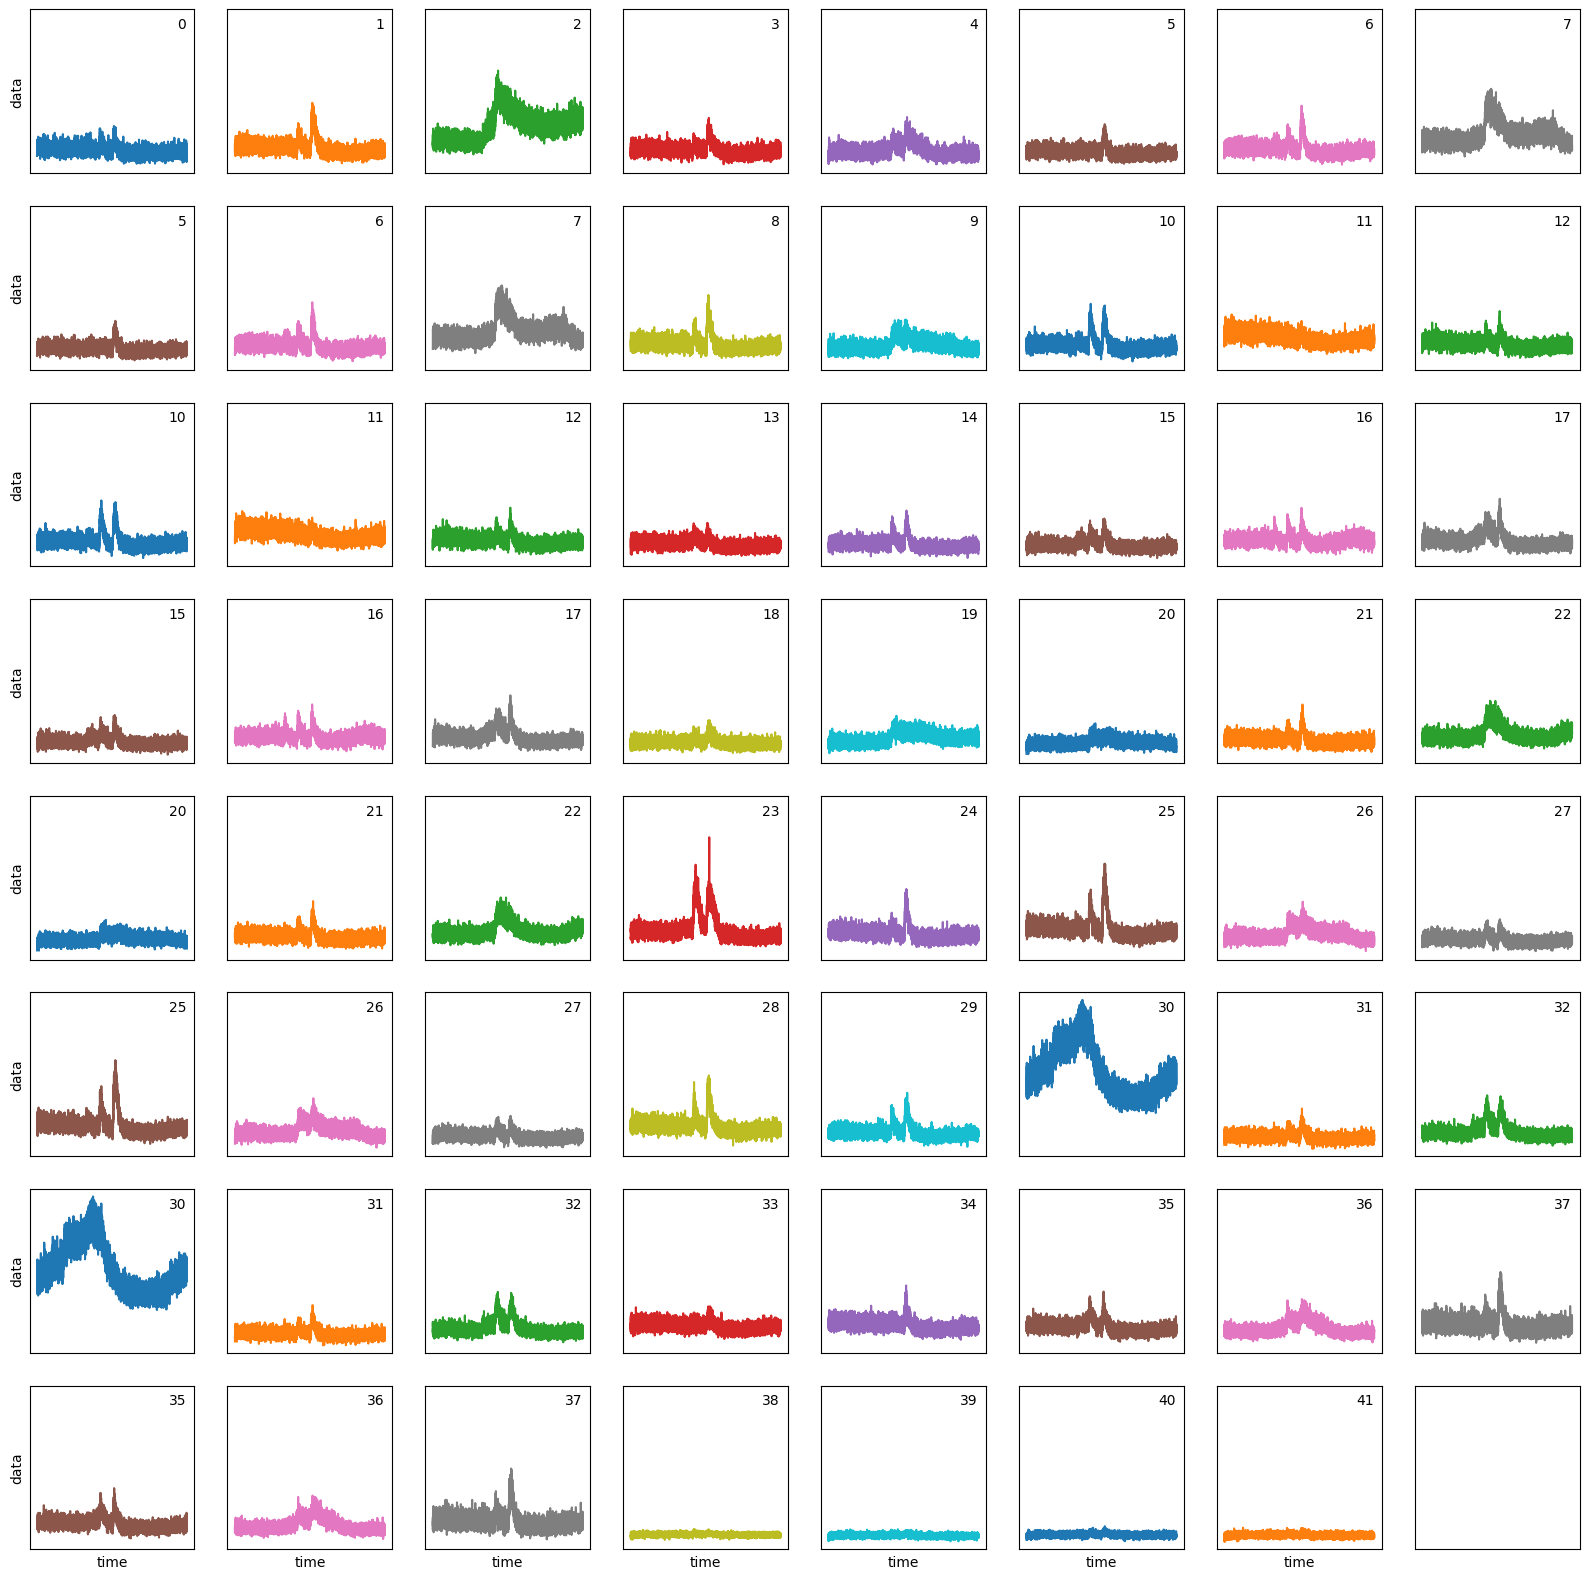

In [47]:
#plot data in grid with a shared x and y axis without any borders and labels, 
# place the column number on the top right corner of each plot and remove the plot title,
# plot each column in a different color 
# show the x and y axis labels only on the bottom left corner plot
# display the y axis
fig, ax = plt.subplots(8, 8, figsize=(20, 20), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        ax[i, j].plot(time_s, data_s[:,i*5+j], color='C{}'.format(i*5+j))
        ax[i, j].set_title('')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].text(0.95, 0.95, '{}'.format(i*5+j), transform=ax[i, j].transAxes, horizontalalignment='right', verticalalignment='top')
        if i == 7:
            ax[i, j].set_xlabel('time')
        if j == 0:
            ax[i, j].set_ylabel('data')